## Plot the work capacity or labor productivity lost as a function of humid heat (sWBGT)
### ERFs from Kjellstrom et al./Watts et al. Lancet Countdown, as well as Foster et al. 2021

In [1]:
FIGUREPATH =  '/Users/lukeaparsons/Documents/Manuscripts/Foster/scripts/Figures/'

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy import stats
from scipy import signal
from scipy import special #note this is used in Kjellstrom 2018 erf
import time

import matplotlib.pyplot as plt

In [3]:
#define a range of swbgt values for plotting, defining work capacity losses
sWBGTs = np.arange(10,55,.5)


In [4]:
LaborTypes = ['light','medium','heavy']
for n in range(2,3): #just 2 if want heavy labor
    print('Labor type selected is:',LaborTypes[n])

Labor type selected is: heavy


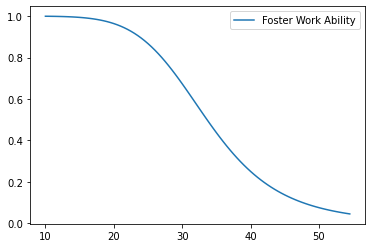

In [5]:
#plot the ERF used in Python code for Foster to calculate WA (Work Ability)
plt.plot(sWBGTs,(100/(1 + (33.63/sWBGTs)**(-6.33)))/100,label='Foster Work Ability')
plt.legend()

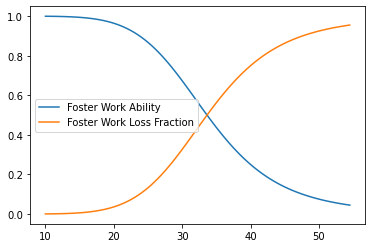

In [6]:
#Foster 2021 method:

PWC = 100 /(1 + (33.63/sWBGTs)**(-6.33))
WA_Foster = PWC/100
WL_Foster = 1 - WA_Foster
plt.plot(sWBGTs,WA_Foster,label='Foster Work Ability')
plt.plot(sWBGTs,WL_Foster,label='Foster Work Loss Fraction')
plt.legend()

In [7]:
#Watts et al. 2020 Lancet Countdown Method, also Kjellstrom et al. 2018 (NO cutoff at 90%)

WBGTaver = 32.465
WBGTSD = 4.1607

LossFraction =  0.5 * (1 + special.erf( (sWBGTs - WBGTaver) / (WBGTSD * np.sqrt(2))  ) )


In [8]:
# Yuqiang method three types of labor (light, medium, heavy):
LaborTypes = ['light','medium','heavy']
nwork = 3
WA_out = np.zeros(nwork)
alpha1 = (34.64, 32.93, 30.94)
alpha2 = (22.72, 17.81, 16.64)
shade = (4.0, 4.0, 0.0)

n = 2

WL = np.zeros(np.shape(sWBGTs))

WL = 1 - (0.1 + 0.9 / (1. + (( sWBGTs - shade[n])/alpha1[n]) ** alpha2[n] ))

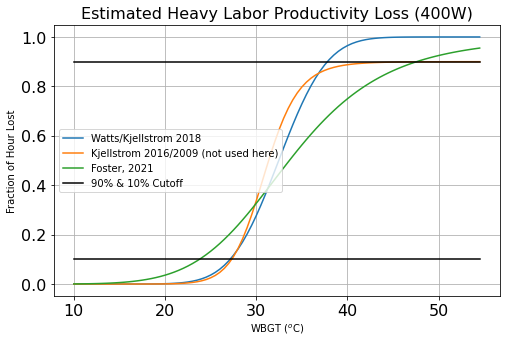

In [14]:
fsize = 16

fig = plt.figure(figsize=(8,5))

plt.plot(sWBGTs,LossFraction,label='Watts/Kjellstrom 2018') #used here
plt.plot(sWBGTs,WL,label='Kjellstrom 2016/2009 (not used here)') #NOT used here- used in previous work
plt.plot(sWBGTs,1-(PWC/100),label='Foster, 2021') #used here

plt.plot(sWBGTs,np.ones(np.shape(sWBGTs))*.1,color='k',label='90% & 10% Cutoff')
plt.plot(sWBGTs,np.ones(np.shape(sWBGTs))*.9,color='k')
plt.grid()
plt.xlabel('WBGT ($^o$C)')
plt.ylabel('Fraction of Hour Lost')
plt.legend()
plt.title('Estimated Heavy Labor Productivity Loss (400W)',fontsize=fsize)
plt.yticks(fontsize=fsize)
plt.xticks(fontsize=fsize)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

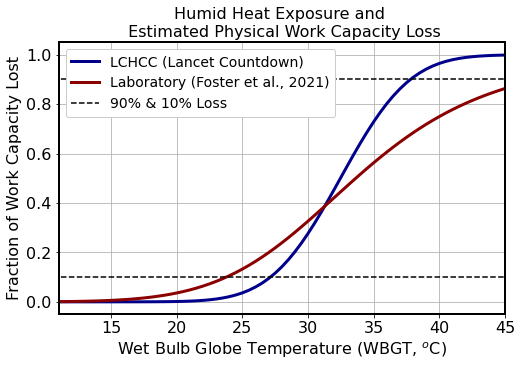

In [10]:

fsize = 16
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(1,1,1)
plt.plot(sWBGTs,LossFraction,color='darkblue',linewidth=3,label='LCHCC (Lancet Countdown)')
#plt.plot(sWBGTs,WL,label='Yuqiang/Kjellstrom 2016/2009')
plt.plot(sWBGTs,1-(PWC/100),color='darkred',linewidth=3,label='Laboratory (Foster et al., 2021)')
plt.plot(sWBGTs,np.ones(np.shape(sWBGTs))*.1,color='k',linestyle='--',label='90% & 10% Loss')
plt.plot(sWBGTs,np.ones(np.shape(sWBGTs))*.9,color='k',linestyle='--')
plt.xlabel('Wet Bulb Globe Temperature (WBGT, $^o$C)',fontsize=fsize)
plt.ylabel('Fraction of Work Capacity Lost',fontsize=fsize)
plt.xlim([11,45])
plt.grid()
plt.yticks(fontsize=fsize)
plt.xticks(fontsize=fsize)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
#plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left',fontsize=fsize)
plt.legend(fontsize=fsize-2,loc='upper left',framealpha=1)
plt.title('Humid Heat Exposure and \n Estimated Physical Work Capacity Loss',fontsize=fsize)

fig.savefig(FIGUREPATH + 'Kjellstrom2018_Foster2021_ERF_Curves',dpi=300,bbox_inches='tight')
